In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name ="MedianHouseValue")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: |{coef:.4f}")

print(f"\n Mean Absolite Error (MAE): {mae:.4f}")
print(f" Mean Sqaured Error (MSE): {mse:.4f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f" R^2 Score: {r2:.4f}")

def adjusted_r2(r2, n, p):
    return 1 - ((1- r2) * (n-1)) / (n - p - 1)

r2 = model.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = adjusted_r2(r2, n, p)
print(f"Adjusted R^2: {adj_r2:.4f}")

Model Coefficients:
MedInc: |0.4487
HouseAge: |0.0097
AveRooms: |-0.1233
AveBedrms: |0.7831
Population: |-0.0000
AveOccup: |-0.0035
Latitude: |-0.4198
Longitude: |-0.4337

 Mean Absolite Error (MAE): 0.5332
 Mean Sqaured Error (MSE): 0.5559
 Root Mean Squared Error (RMSE): 0.7456
 R^2 Score: 0.5758
Adjusted R^2: 0.5750


/var/folders/3z/j19155j53837tjkhyx5r2rt80000gn/T/ipykernel_26957/3479660817.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


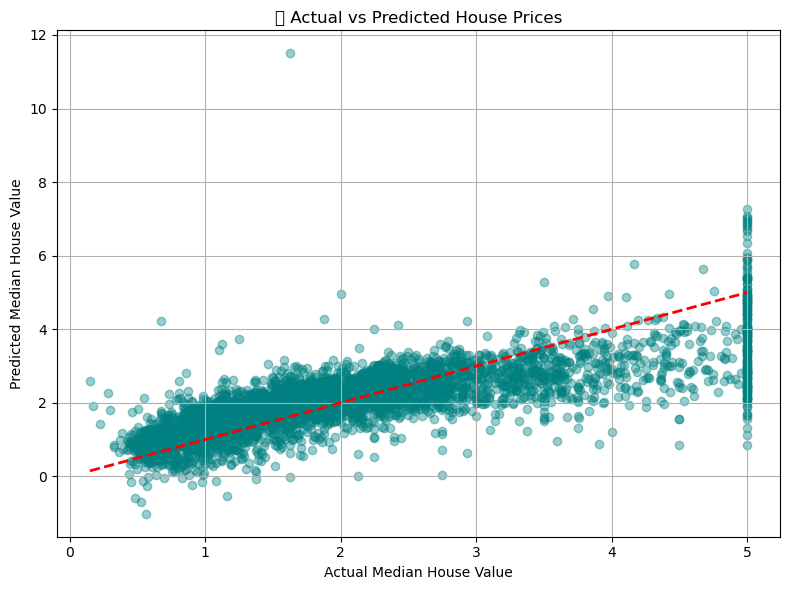

In [17]:
import matplotlib.pyplot as plt

# 🟦 Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("📊 Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()